# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 1 декабря 23:59 [уточняется]**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Для получения гаранированной воспроизводимости результата псевдослучайных операций. Фиксированные сиды будут выдавать одни и те же значения, например при разбивке данных на train и test объекты попавшие в каждый фрейм будут одинаковыми при каждом перезапуске ячейки с фиксированным сидом.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [x] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [x] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [x] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [x] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

Отобразите 10 случайных строк тренировочного датасета (0.15 балла)

The dataset contains the following columns:

1. name: The name or model of the car.
2. year: The manufacturing year of the car.
3. selling_price: The price at which the car was sold.
4. km_driven: The number of kilometers driven by the car.
5. fuel: The type of fuel the car uses.
6. seller_type: The type of seller (individual, dealer, or Trustmark dealer).
7. transmission: The type of transmission (manual or automatic).
8. owner: The number of previous owners of the car.
9. mileage: The mileage of the car in kilometers per liter.
10. engine: The engine displacement in cubic centimeters (CC).
11. max_power: The maximum power output of the car's engine.
12. torque: The torque Newton meters along with Revolutions per minute.
13. seats: The number of seats in the car.

In [ ]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6973,Tata Nexon 1.5 Revotorq XT,2018,800000,85000,Diesel,Individual,Manual,Second Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2638,Maruti Wagon R VXI,2006,135000,62900,Petrol,Individual,Manual,First Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
4256,Maruti Swift Dzire VDI,2019,675000,25000,Diesel,Individual,Manual,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
5699,Maruti Swift Dzire ZDI,2018,780000,30000,Diesel,Individual,Manual,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
2629,Maruti Omni E MPI STD BS IV,2016,190000,80000,Petrol,Individual,Manual,Second Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
5512,Tata Indica V2 LSi,2008,85000,25000,Petrol,Individual,Manual,Second Owner,16.84 kmpl,1193 CC,64.4 bhp,99.8Nm@ 2700rpm,5.0
4885,Tata Nano Twist XE,2015,110000,15000,Petrol,Individual,Manual,First Owner,25.4 kmpl,624 CC,37.5 bhp,51Nm@ 4000+/-500rpm,4.0
1964,Maruti Omni 8 Seater BSII,2010,130000,120000,Petrol,Individual,Manual,Third Owner,19.7 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,8.0
2343,Ford EcoSport 1.5 Ti VCT AT Titanium BSIV,2015,775000,30000,Petrol,Individual,Automatic,First Owner,15.63 kmpl,1499 CC,110.4 bhp,140Nm@ 4400rpm,5.0
5179,Mahindra TUV 300 T8,2017,700000,40000,Diesel,Individual,Manual,First Owner,18.49 kmpl,1493 CC,100 bhp,240Nm@ 1600-2800rpm,7.0


Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)

In [ ]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [ ]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


Посмотрите, есть ли в датасете пропуски.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


 Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)

In [ ]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

,0
mileage,202
engine,202
max_power,196
torque,203
seats,202


In [ ]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

,0
mileage,19
engine,19
max_power,19
torque,19
seats,19


Посмотрите, есть ли в данных явные дубликаты (0.05 балла)

In [ ]:
df_train.duplicated().sum()

985

In [ ]:
df_test.duplicated().sum()

62

In [ ]:
df_train = df_train.drop_duplicates()

In [ ]:
df_train.duplicated().sum()

0

Постройте дашборд, используя ydata-profilling(0.15 балла)

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.7 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
DATASET = "https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv"

In [ ]:
df_copy = pd.read_csv(DATASET)
profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')
profile_report
profile_report.to_file('cars.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

Задача :

 Уберите единицы измерения для признаков mileage, engine, max_power.
 Приведите тип данных к float.
 Предобработайте признак torque — разделите его на два: собственно torque и max_torque_rpm. Учтите единицы измерения
Важно

Все действия нужно производить над обоими датасетами — train и test.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6014 entries, 0 to 6996
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6014 non-null   object 
 1   year           6014 non-null   int64  
 2   selling_price  6014 non-null   int64  
 3   km_driven      6014 non-null   int64  
 4   fuel           6014 non-null   object 
 5   seller_type    6014 non-null   object 
 6   transmission   6014 non-null   object 
 7   owner          6014 non-null   object 
 8   mileage        5824 non-null   object 
 9   engine         5824 non-null   object 
 10  max_power      5827 non-null   object 
 11  torque         5823 non-null   object 
 12  seats          5824 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 657.8+ KB


In [ ]:
df_train['mileage'].apply(lambda x: str(x).split()[-1]).value_counts()

,count
mileage,
kmpl,5746
nan,190
km/kg,78


In [ ]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(str(x)[:-6])*1.40 \
                                          if str(x).endswith('km/kg') else x)
df_train['mileage'] = df_train['mileage'].apply(lambda x: str(x).split()[0]).astype(float)

In [ ]:
df_train['mileage'].isna().sum()

190

In [ ]:
df_train['mileage'] = df_train['mileage'].fillna(df_train['mileage'].median())

In [ ]:
mileage_med = df_train['mileage'].median()
mileage_med

19.575

In [ ]:
df_train['mileage'].describe()

,mileage
count,6014.000000
mean,19.593981
std,4.224457
min,0.000000
25%,17.000000
50%,19.575000
75%,22.320000
max,46.816000


In [ ]:
df_train['mileage'].isna().sum()

0

In [ ]:
df_train['engine'].apply(lambda x: str(x).split()[-1]).value_counts()

,count
engine,
CC,5824
nan,190


In [ ]:
df_train['engine'] = df_train['engine'].apply(lambda x: str(x).split()[0]).astype(float)

In [ ]:
df_train['engine'].isna().sum()

190

In [ ]:
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median())

In [ ]:
engine_med = df_train['engine'].median()
engine_med

1248.0

In [ ]:
df_train['engine'].describe()

,engine
count,6014.000000
mean,1425.702694
std,484.728537
min,624.000000
25%,1197.000000
50%,1248.000000
75%,1498.000000
max,3604.000000


In [ ]:
df_train['engine'].isna().sum()

0

In [ ]:
df_train['max_power'] = df_train['max_power'].apply(lambda x: str(x).split()[0])
df_train['max_power'] = df_train['max_power'].apply(lambda x: str(x).replace('bhp', 'nan'))
df_train['max_power'] = df_train['max_power'].astype(float)

In [ ]:
df_train['max_power'].isna().sum()

188

In [ ]:
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())

In [ ]:
max_power_med = df_train['max_power'].median()
max_power_med

81.83

In [ ]:
df_train['max_power'].describe()

,max_power
count,6014.000000
mean,87.681216
std,31.554047
min,0.000000
25%,68.000000
50%,81.830000
75%,99.000000
max,400.000000


In [ ]:
df_train['max_power'].isna().sum()

0

In [ ]:
df_train['tor'] = df_train['torque'].apply(lambda x: str(x).split()[0])

In [ ]:
df_train['t'] = df_train['tor'].apply(lambda x: float(str(x)[:-2]) if str(x).lower()[-2:] == 'nm'
                  else float(380) if str(x) == '380Nm(38.7kgm)@'
                  else float(x) * 9.80665 if str(x)[-1] != '@'
                  else float(str(x)[:-4]) * 9.80665 if str(x)[-3:] == 'gm@'
                  else float(str(x)[:-3]) if str(x).lower()[-2:] == 'm@'
                  else float(str(x)[:-1]) * 9.80665 if str(x) != 'nan' else x)
print(df_train['t'].isna().sum())
df_train['t'] = df_train['t'].fillna(df_train['t'].median())

191


In [ ]:
torque_med = df_train['t'].median()
torque_med

160.0

In [ ]:
df_train['t'].isna().sum()

0

In [ ]:
df_train['max_torque_rpm'] = df_train['torque'].apply(lambda x: x if str(x) != '400Nm' else None)

df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).replace('(kgm@ rpm)', ''))
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).replace('kgm at ', ''))
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).replace('Nm@', ''))
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).replace('rpm', ''))
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).replace('nm@', ''))
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).replace('@', ''))
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).replace(',', ''))

df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).split()[1:])
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: ' '.join(x))
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).replace('~', '-'))
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).replace('/', ''))
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).replace('21800', '2180'))
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).split('+-')[0])
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: 3000 if str(x) == 'KGM at 3000 RPM'
       else 1900-2750 if str(x) == 'KGM at 1900-2750 RPM' else str(x).split()[-1] if x else x)
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).split('-')[-1] if x else x)
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].replace('', None)
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: int(x) if x else x)
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].astype(np.int64)

In [ ]:
max_torque_rpm_med = df_train['max_torque_rpm'].median()
max_torque_rpm_med

3000.0

In [ ]:
df_train['max_torque_rpm'].describe()

,max_torque_rpm
count,6014.000000
mean,3037.947788
std,881.006356
min,850.000000
25%,2250.000000
50%,3000.000000
75%,4000.000000
max,5300.000000


In [ ]:
df_train['max_torque_rpm'].isna().sum()

0

In [ ]:
df_train['torque'] = df_train['t']

In [ ]:
df_train['seats'].isna().sum()

190

In [ ]:
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())

In [ ]:
seats_med = df_train['seats'].median()
seats_med

5.0

In [ ]:
df_train['seats'].describe()

,seats
count,6014.000000
mean,5.423844
std,0.978959
min,2.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,14.000000


In [ ]:
df_train['seats'].isna().sum()

0

In [ ]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'tor', 't', 'max_torque_rpm'],
      dtype='object')

In [ ]:
df_train = df_train[['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm']]

In [ ]:
df_train.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6014 entries, 0 to 6996
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            6014 non-null   object 
 1   year            6014 non-null   int64  
 2   selling_price   6014 non-null   int64  
 3   km_driven       6014 non-null   int64  
 4   fuel            6014 non-null   object 
 5   seller_type     6014 non-null   object 
 6   transmission    6014 non-null   object 
 7   owner           6014 non-null   object 
 8   mileage         6014 non-null   float64
 9   engine          6014 non-null   float64
 10  max_power       6014 non-null   float64
 11  torque          6014 non-null   float64
 12  seats           6014 non-null   float64
 13  max_torque_rpm  6014 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 704.8+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [ ]:
df_test['mileage'].apply(lambda x: str(x).split()[-1]).value_counts()

,count
mileage,
kmpl,972
nan,19
km/kg,9


In [ ]:
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(str(x)[:-6])*1.40 \
                                          if str(x).endswith('km/kg') else x)
df_test['mileage'] = df_test['mileage'].apply(lambda x: str(x).split()[0]).astype(float)

In [ ]:
df_test['mileage'].isna().sum()

19

In [ ]:
df_test['mileage'].median()

19.33

In [ ]:
mileage_med

19.575

In [ ]:
df_test['mileage'] = df_test['mileage'].fillna(mileage_med)

In [ ]:
df_test['mileage'].describe()

,mileage
count,1000.000000
mean,19.417501
std,4.090412
min,0.000000
25%,16.587500
50%,19.400000
75%,22.320000
max,45.164000


In [ ]:
df_test['mileage'].isna().sum()

0

In [ ]:
df_test['engine'].apply(lambda x: str(x).split()[-1]).value_counts()

,count
engine,
CC,981
nan,19


In [ ]:
df_test['engine'] = df_test['engine'].apply(lambda x: str(x).split()[0]).astype(float)
df_test['engine'].isna().sum()

19

In [ ]:
df_test['engine'].median()

1248.0

In [ ]:
engine_med

1248.0

In [ ]:
df_test['engine'] = df_test['engine'].fillna(engine_med)

In [ ]:
df_test['engine'].describe()

,engine
count,1000.00000
mean,1454.87600
std,521.99574
min,624.00000
25%,1197.00000
50%,1248.00000
75%,1582.00000
max,3604.00000


In [ ]:
df_test['engine'].isna().sum()

0

In [ ]:
df_test['max_power'] = df_test['max_power'].apply(lambda x: str(x).split()[0])
df_test['max_power'] = df_test['max_power'].apply(lambda x: str(x).replace('bhp', 'nan'))
df_test['max_power'] = df_test['max_power'].astype(float)

In [ ]:
df_test['max_power'].isna().sum()

19

In [ ]:
df_test['max_power'].median()

83.1

In [ ]:
max_power_med

81.83

In [ ]:
df_test['max_power'] = df_test['max_power'].fillna(max_power_med)

In [ ]:
df_test['max_power'].describe()

,max_power
count,1000.000000
mean,90.841100
std,34.893536
min,34.200000
25%,69.000000
50%,82.425000
75%,102.000000
max,280.000000


In [ ]:
df_test['max_power'].isna().sum()

0

In [ ]:
df_test['tor'] = df_test['torque'].apply(lambda x: str(x).split()[0])
df_test['t'] = df_test['tor'].apply(lambda x: float(str(x)[:-2]) if str(x).lower()[-2:] == 'nm'
                  else float(110) if str(x) == '110(11.2)@'
                  else float(x) * 9.80665 if str(x)[-1] != '@'
                  else float(str(x)[:-4]) * 9.80665 if str(x)[-3:] == 'gm@'
                  else float(str(x)[:-3]) if str(x).lower()[-2:] == 'm@'
                  else float(str(x)[:-1]) * 9.80665 if str(x) != 'nan' else x)
df_test['t'].isna().sum()

19

In [ ]:
df_test['t'].median()

172.5

In [ ]:
torque_med

160.0

In [ ]:
df_test['t'] = df_test['t'].fillna(torque_med)

In [ ]:
df_test['t'].isna().sum()

0

In [ ]:
df_test['max_torque_rpm'] = df_test['torque'].apply(lambda x: x if str(x) != '400Nm' else None)

df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).replace('(kgm@ rpm)', ''))
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).replace('kgm at ', ''))
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).replace('Nm@', ''))
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).replace('rpm', ''))
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).replace('nm@', ''))
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).replace('@', ''))
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).replace(',', ''))

df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).split()[1:])
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: ' '.join(x))
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).replace('~', '-'))
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).replace('/', ''))
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).replace('21800', '2180'))
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).split('+-')[0])
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: 3000 if str(x) == 'KGM at 3000 RPM'
       else 1900-2750 if str(x) == 'KGM at 1900-2750 RPM' else str(x).split()[-1] if x else x)
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).split('-')[-1] if x else x)
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].replace('', None)
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: int(x) if x else x)

In [ ]:
df_test['max_torque_rpm'].median()

3000.0

In [ ]:
max_torque_rpm_med

3000.0

In [ ]:
df_test['max_torque_rpm'].isna().sum()

23

In [ ]:
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].fillna(max_torque_rpm_med)
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].astype(np.int64)

In [ ]:
df_test['max_torque_rpm'].isna().sum()

0

In [ ]:
df_test['max_torque_rpm'].describe()

,max_torque_rpm
count,1000.000000
mean,3096.376000
std,879.955592
min,850.000000
25%,2500.000000
50%,3000.000000
75%,4000.000000
max,5200.000000


In [ ]:
df_test['torque'] = df_test['t']

In [ ]:
df_test['seats'].isna().sum()

19

In [ ]:
df_test['seats'].median()

5.0

In [ ]:
seats_med

5.0

In [ ]:
df_test['seats'] = df_test['seats'].fillna(seats_med)

In [ ]:
df_test['seats'].isna().sum()

0

In [ ]:
df_test['seats'].describe()

,seats
count,1000.000000
mean,5.403000
std,0.912921
min,4.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,9.000000


In [ ]:
df_test.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'tor', 't', 'max_torque_rpm'],
      dtype='object')

In [ ]:
df_test = df_test[['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm']]

In [ ]:
df_test.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   float64
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   float64
 13  max_torque_rpm  1000 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 109.5+ KB


### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [x] Отобразите такие объекты (0.15 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [ ]:
df_train.drop(columns=['selling_price']).duplicated().sum()

174

In [ ]:
df_train[df_train.drop(columns=['selling_price']).duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.80,114.0,5.0,4000
370,BMW X4 M Sport X xDrive20d,2019,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190.00,400.0,5.0,2500
444,Maruti Alto 800 VXI,2016,270000,50000,Petrol,Individual,Manual,First Owner,22.74,796.0,47.30,69.0,5.0,3500
766,Chevrolet Beat Diesel LT,2012,200000,70000,Diesel,Individual,Manual,Second Owner,25.44,936.0,57.60,150.0,5.0,1750
1000,Maruti Alto LXI,2005,80000,40000,Petrol,Individual,Manual,Second Owner,19.70,796.0,46.30,62.0,5.0,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,Datsun RediGO T Option,2016,200000,35000,Petrol,Individual,Manual,First Owner,22.70,799.0,53.64,72.0,5.0,4386
6891,Maruti Alto 800 LXI,2017,270000,35000,Petrol,Individual,Manual,First Owner,24.70,796.0,47.30,69.0,5.0,3500
6906,Maruti Swift VDI,2012,416000,90000,Diesel,Individual,Manual,Second Owner,22.90,1248.0,74.00,190.0,5.0,2000
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,90.3,5.0,4200


In [ ]:
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')

In [ ]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,2500
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,2750
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,4500
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.100000,5.0,3000
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.000000,5.0,3500
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0,4000
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0,2750


In [ ]:
df_train = df_train.reset_index(drop=True)

In [ ]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,2500
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,2750
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,4500
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.100000,5.0,3000
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.000000,5.0,3500
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0,4000
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0,2750


In [ ]:
df_train.shape

(5840, 14)

In [ ]:
assert df_train.shape == (5840, 14)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

Все указанные в задании действия уже были выполнены ранее

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   float64
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 638.9+ KB


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.

In [ ]:
df_train['engine'] = df_train['engine'].astype(np.int64)
df_train['seats'] = df_train['seats'].astype(np.int64)

df_test['engine'] = df_test['engine'].astype(np.int64)
df_test['seats'] = df_test['seats'].astype(np.int64)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int64  
 13  max_torque_rpm  5840 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 638.9+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   int64  
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   int64  
 13  max_torque_rpm  1000 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 109.5+ KB


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [ ]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.00000
mean,2013.428425,5.229601e+05,7.395224e+04,19.552709,1429.448973,87.905426,200.910300,5.426712,3039.50137
std,4.095622,5.354320e+05,6.007114e+04,4.228207,485.662834,31.640599,247.410887,0.982344,881.55650
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.071920,2.000000,850.00000
25%,2011.000000,2.500000e+05,3.900000e+04,17.000000,1197.000000,68.000000,111.800000,5.000000,2250.00000
50%,2014.000000,4.050000e+05,7.000000e+04,19.575000,1248.000000,81.830000,160.000000,5.000000,3000.00000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,99.000000,204.000000,5.000000,4000.00000
max,2020.000000,1.000000e+07,2.360457e+06,46.816000,3604.000000,400.000000,5001.391500,14.000000,5300.00000


In [ ]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.417501,1454.87600,90.841100,206.238990,5.403000,3096.376000
std,4.012149,7.585539e+05,48486.218662,4.090412,521.99574,34.893536,249.206283,0.912921,879.955592
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,48.000000,4.000000,850.000000
25%,2011.000000,2.500000e+05,37000.000000,16.587500,1197.00000,69.000000,111.700000,5.000000,2500.000000
50%,2014.000000,4.349990e+05,61500.000000,19.400000,1248.00000,82.425000,165.000000,5.000000,3000.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.00000,102.000000,215.000000,5.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,45.164000,3604.00000,280.000000,2549.729000,9.000000,5200.000000


In [ ]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [ ]:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [ ]:
assert df_train.shape == (5840, 14)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [ ]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'],
      dtype='object')

In [ ]:
df_train._get_numeric_data().head()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,450000,145500,23.40,1248,74.00,190.000000,5,2000
1,2014,370000,120000,21.14,1498,103.52,250.000000,5,2500
2,2010,225000,127000,23.00,1396,90.00,219.668960,5,2750
3,2007,130000,120000,16.10,1298,88.20,112.776475,5,4500
4,2017,440000,45000,20.14,1197,81.86,113.750000,5,4000


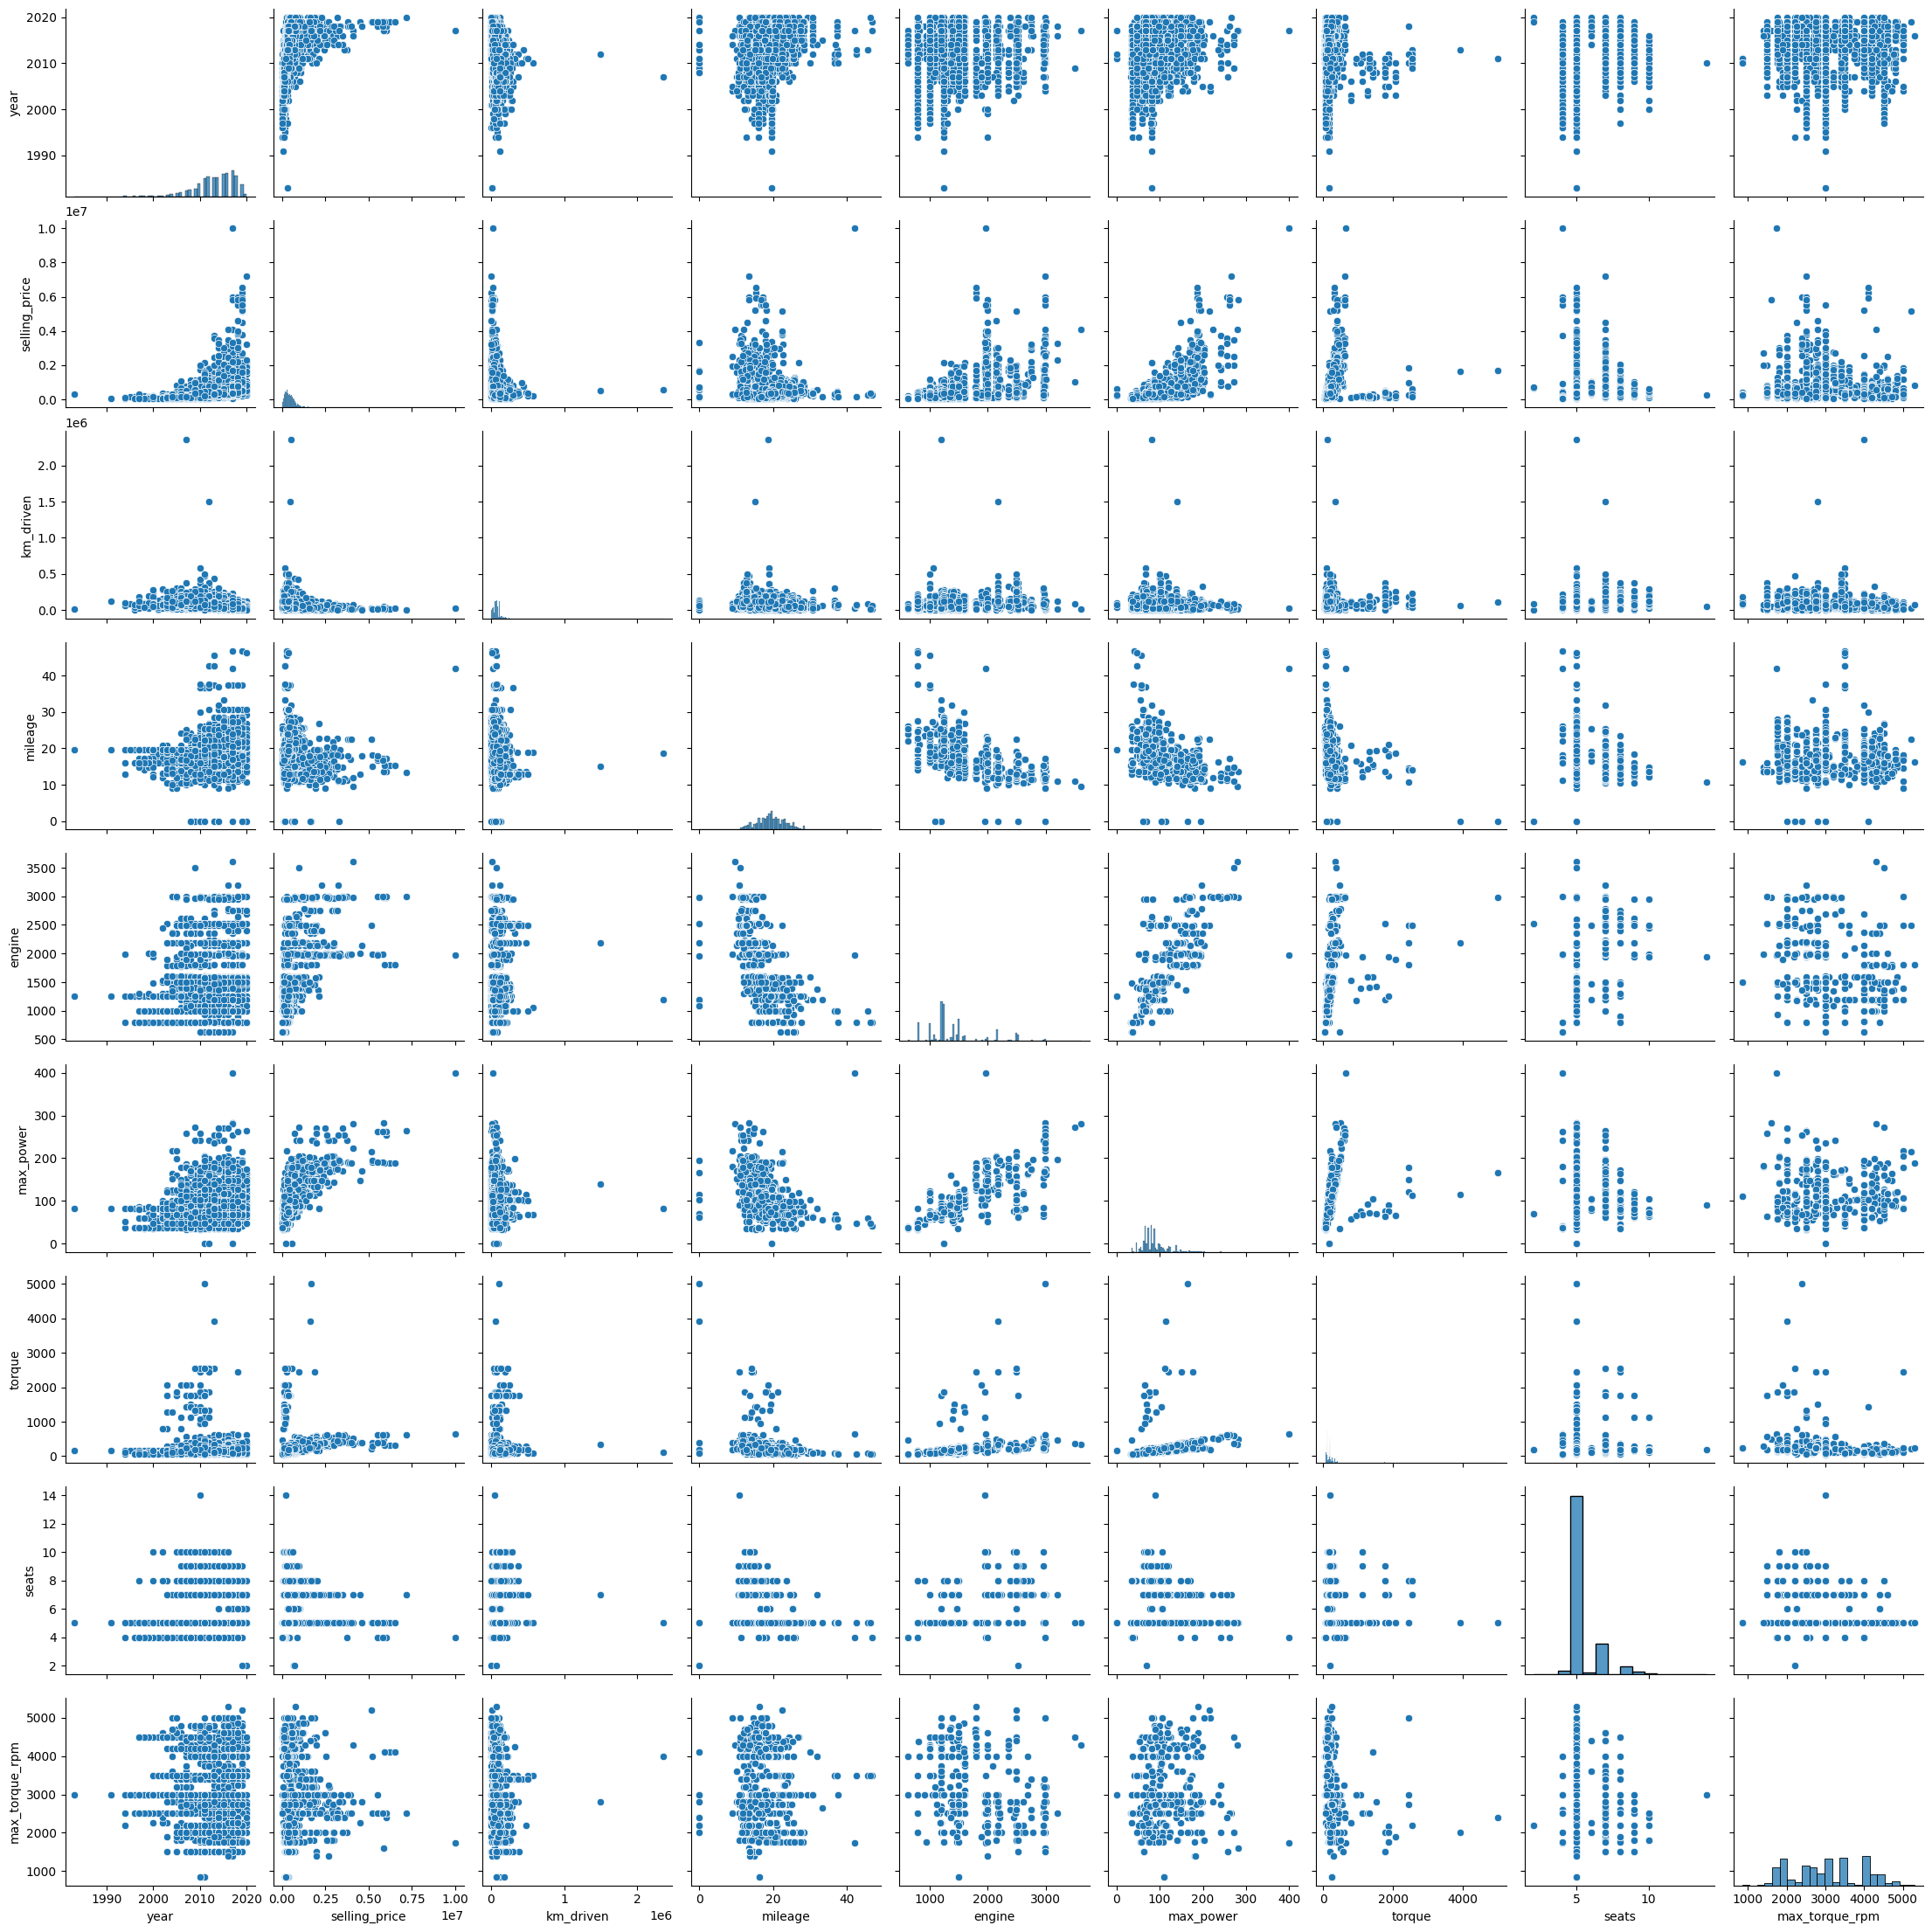

In [ ]:
sns.pairplot(df_train._get_numeric_data())

Можно ли предположить на основе распределений связь признаков с целевой переменной?

selling_price - целевая переменная, стоимость<br>
max_torque_rpm - стоимость не имеет явной зависимости от этого признака<br>
seats - стоимость не имеет явной зависимости от этого признака<br>
torque - стоимость имеет зависимость, нужно посмотреть внимательнее<br>
max_power - стоимость увеличивается при росте этого признака<br>
engine - стоимость увеличивается при росте этого признака<br>
mileage - стоимость уменьшается при росте этого признака<br>
km_driven - стоимость уменьшается при росте этого признака<br>
year - стоимость увеличивается при росте этого признака<br>

Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Похоже, что есть зависимость между max_power и engine, max_power и torque.

Постройте pairplot по тестовым данным

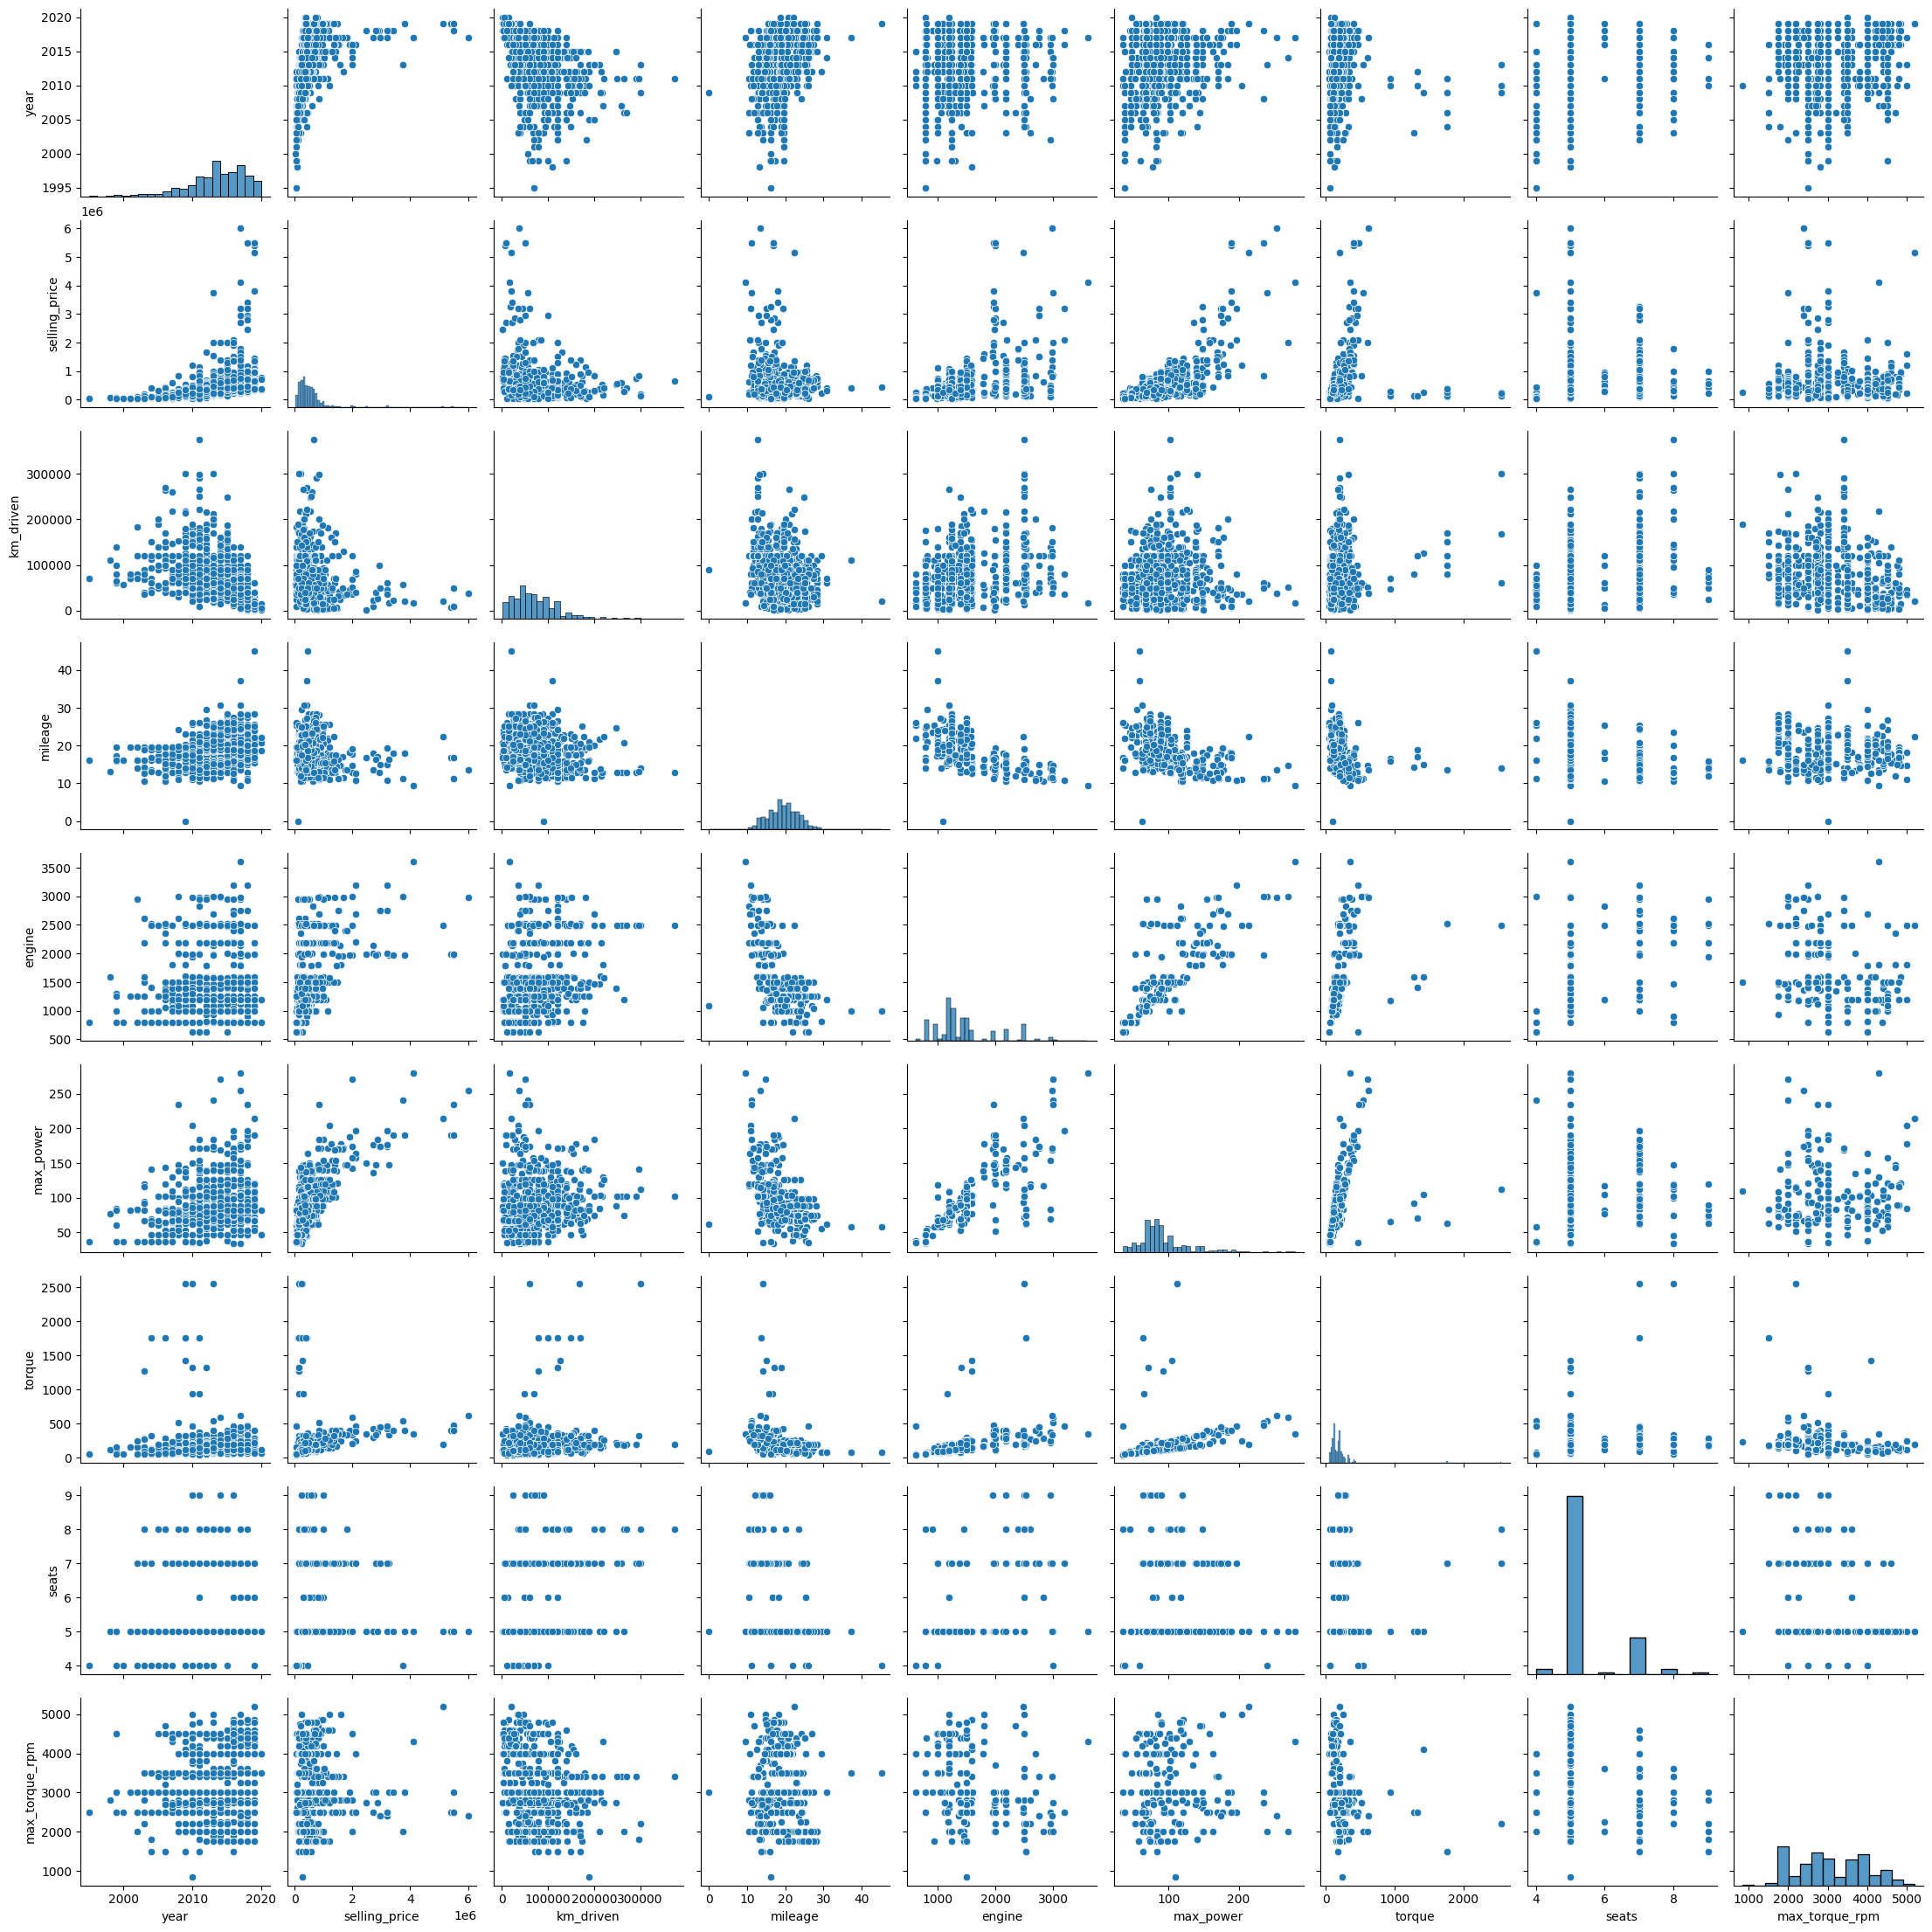

In [ ]:
sns.pairplot(df_test._get_numeric_data())

Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

Да, совокупности схожи

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи pd.corr()

In [ ]:
df_train._get_numeric_data().corr(method='pearson')

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.427279,-0.368966,0.320880,0.002819,0.156904,-0.067016,0.041178,0.060684
selling_price,0.427279,1.000000,-0.164828,-0.112056,0.447672,0.692827,0.174199,0.149953,-0.087290
km_driven,-0.368966,-0.164828,1.000000,-0.171371,0.229766,0.024579,0.135037,0.192328,-0.219940
mileage,0.320880,-0.112056,-0.171371,1.000000,-0.562194,-0.376958,-0.236923,-0.437552,-0.155151
engine,0.002819,0.447672,0.229766,-0.562194,1.000000,0.681124,0.427714,0.652172,-0.257624
max_power,0.156904,0.692827,0.024579,-0.376958,0.681124,1.000000,0.274243,0.244123,-0.023234
torque,-0.067016,0.174199,0.135037,-0.236923,0.427714,0.274243,1.000000,0.244893,-0.272411
seats,0.041178,0.149953,0.192328,-0.437552,0.652172,0.244123,0.244893,1.000000,-0.217821
max_torque_rpm,0.060684,-0.087290,-0.219940,-0.155151,-0.257624,-0.023234,-0.272411,-0.217821,1.000000


По полученным корреляциям постройте тепловую карту (heatmap из бибилотеки seaborn)

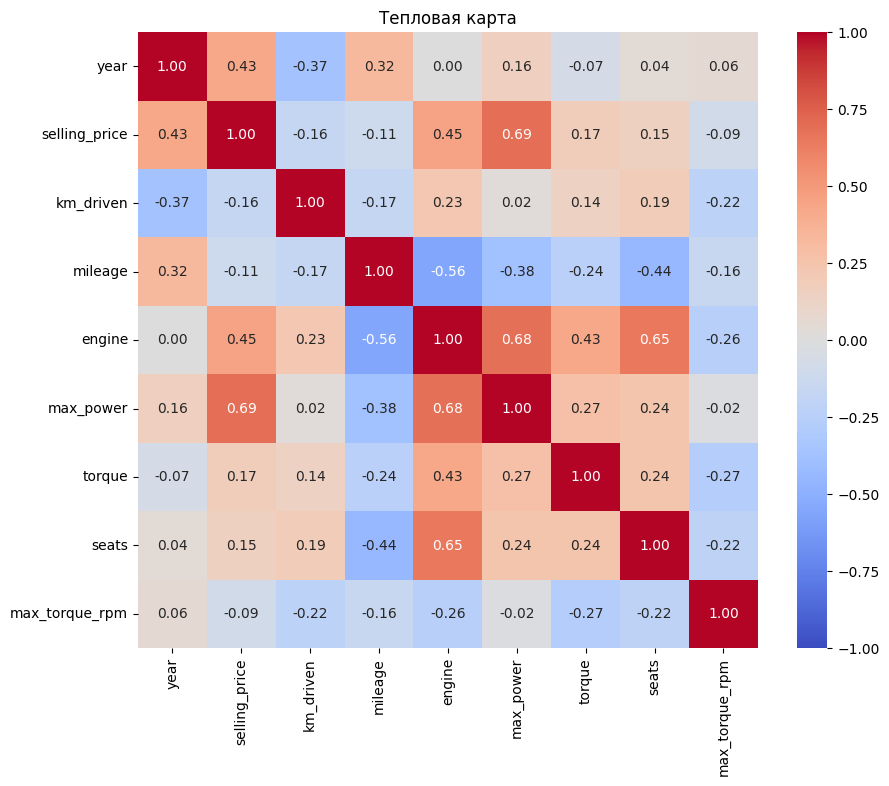

In [ ]:
corr = df_train.corr(numeric_only=True, method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Тепловая карта')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Какие 2 признака наименее скоррелированы между собой?<br>
**year** и **engine**

Между какими наблюдается довольно сильная положительная линейная зависимость?<br>
**selling_price** и **max_power**

Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?<br>
да, это так

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Построим гитограмму распределения целевой переменной

<Axes: >

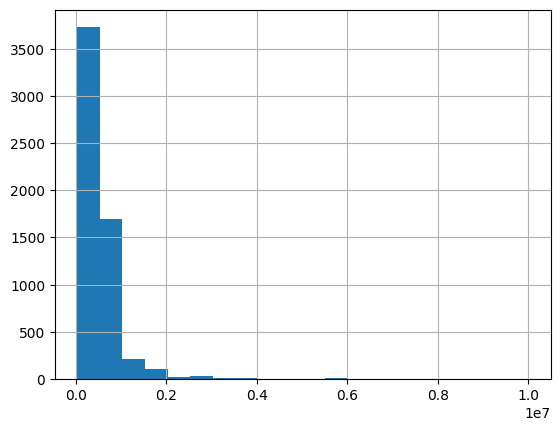

In [ ]:
df_train['selling_price'].hist(bins=20)

<Axes: >

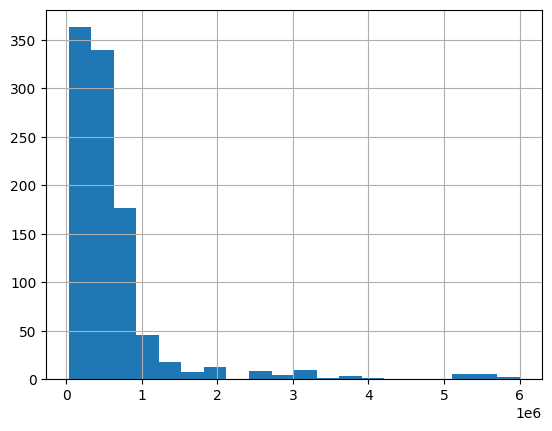

In [ ]:
df_test['selling_price'].hist(bins=20)

Похоже, стоит поробовать её логарифмировать перед обучением модели, а также стоит посмотреть на ящик с усами, скорее всего имеются выбросы

<Axes: xlabel='selling_price'>

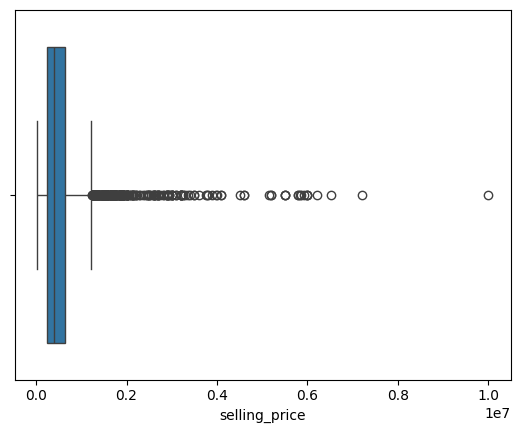

In [ ]:
sns.boxplot(data=df_train, x="selling_price")

<Axes: xlabel='selling_price'>

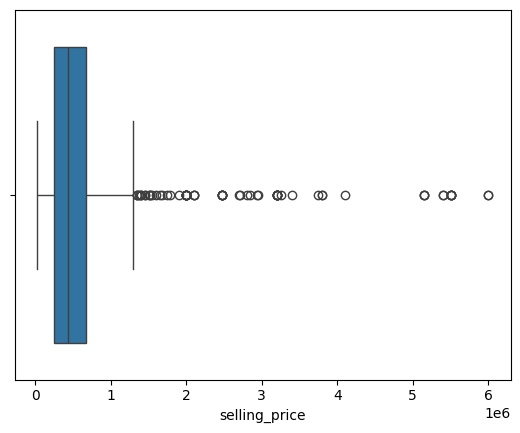

In [ ]:
sns.boxplot(data=df_test, x="selling_price")

Возможно, что в продаже имеются люксовые автомобили, стоит посмотреть внимательнее, либо это выбросы, тогда, можно попробовать их удалить

In [ ]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,2500
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,2750
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,4500
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.100000,5,3000
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.000000,5,3500
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.700000,5,4000
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.359600,5,2750


Нагляднее вывести график с разбивкой по типам продавцов и количеством бывших владельцев

<Axes: xlabel='selling_price', ylabel='seller_type'>

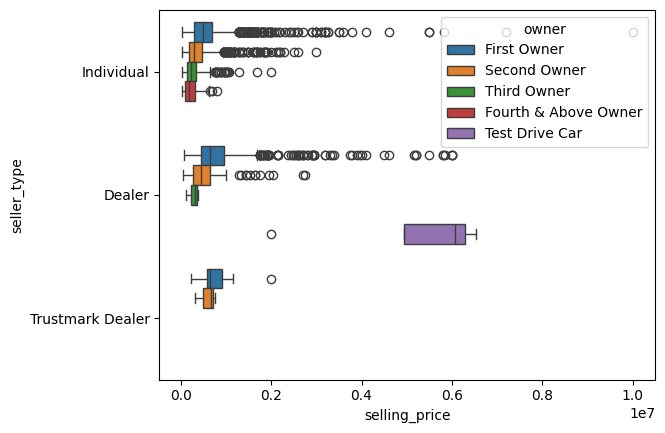

In [ ]:
sns.boxplot(data=df_train, x="selling_price", y="seller_type", hue="owner")

Почему-то стоимость машин с тестдрайва странно завышена, нужно будет разобраться

Посмотрим на распределение стоимости в зависимости от типа коробки передач

<Axes: xlabel='selling_price', ylabel='fuel'>

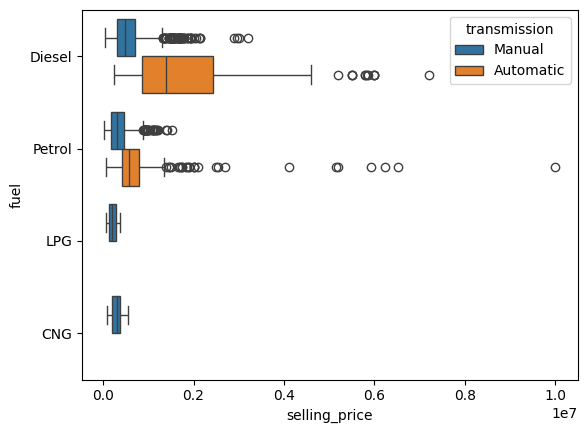

In [ ]:
sns.boxplot(data=df_train, x="selling_price", y="fuel", hue="transmission")

Авто с автоматом дороже и имеют больше потенциальных выбросов

<Axes: xlabel='engine'>

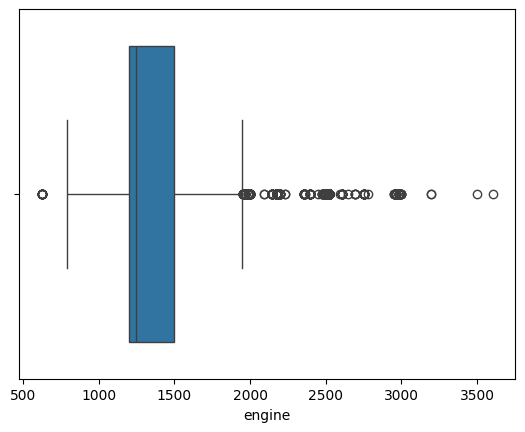

In [ ]:
sns.boxplot(data=df_train, x="engine")

<Axes: xlabel='mileage'>

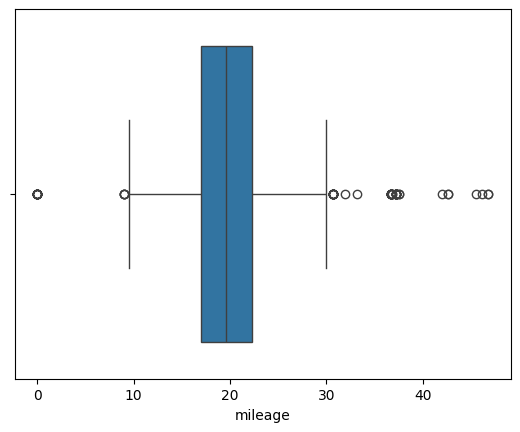

In [ ]:
sns.boxplot(data=df_train, x="mileage")

Стоит проверить выбросы на расходе и объеме двигателя, например сомнителен расход равный 0

Построим тепловую карту по всем признакам

In [ ]:
!pip install phik -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 18.1 MB/s eta 0:00:00


interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


<Axes: >

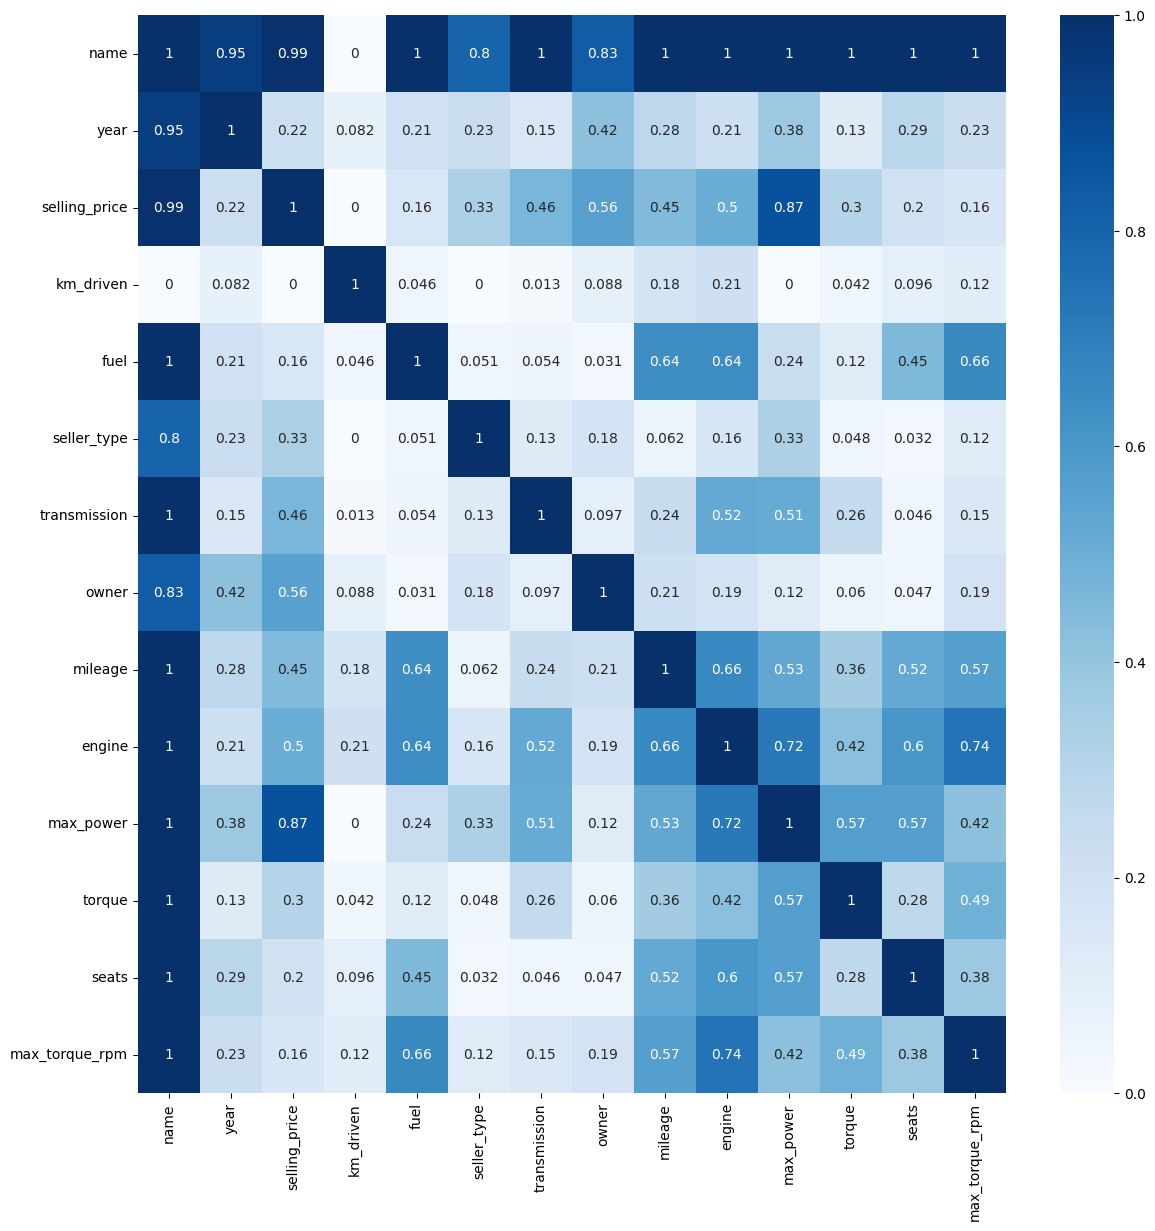

In [ ]:
import phik

plt.figure(figsize=(14,14))
ph = df_train.phik_matrix()
sns.heatmap(ph, cmap="Blues", annot=True)

Высокая корреляция стоимости, марки и модели авто, стоит это отдельно отметить при обучении, также высокая корреляция с количеством бывших владельцев

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [ ]:
y_train = df_train['selling_price']
X_train = df_train._get_numeric_data().drop(columns = ['selling_price'], axis = 1)

In [ ]:
assert X_train.shape == (5840, 8)

In [ ]:
y_test = df_test['selling_price']
X_test = df_test._get_numeric_data().drop(columns = ['selling_price'], axis = 1)

In [ ]:
assert X_test.shape == (1000, 8)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error as MSE, mean_absolute_error as MAE

def business_metric(y_true, y_pred):
    deviation = np.abs((y_pred - y_true) / y_true)
    within_tolerance = deviation <= 0.10
    return within_tolerance.sum() / len(y_pred)


def print_metrics(y_test, pred):
    print(f'''Metrics:
MAE={MAE(y_test, pred)}
MSE={MSE(y_test, pred)}
RMSE={np.sqrt(MSE(y_test, pred))}
R2={r2_score(y_test, pred)}
business_metric={business_metric(y_test, pred)}''')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE, mean_absolute_error as MAE

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print_metrics(y_test, pred)

Metrics:
MAE=221237.030859522
MSE=229680729848.19043
RMSE=479250.1745938028
R2=0.6004361168294934
business_metric=0.242


In [ ]:
y_train.median() # :)

405000.0

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)
X_train_norm = pd.DataFrame(data = scaled_features, columns = X_train.columns)
X_test_norm = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns)

In [ ]:
model = LinearRegression()
model.fit(X_train_norm, y_train)
pred = model.predict(X_test_norm)

print_metrics(y_test, pred)

Metrics:
MAE=221237.03085951804
MSE=229680729848.17838
RMSE=479250.1745937902
R2=0.6004361168295144
business_metric=0.242


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
def print_feature_imp(model, X_test):
    coefs = model.coef_
    feature_names = X_test.columns
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': coefs
    }).sort_values(by='Importance', ascending=False)
    print(importance_df)

print_feature_imp(model, X_test_norm)

          Feature     Importance
4       max_power  334075.129794
0            year  163776.392208
3          engine   25297.781384
5          torque   -1687.590166
2         mileage   -3610.808549
6           seats  -29312.536808
1       km_driven  -49965.483677
7  max_torque_rpm  -60787.189556


**max_power** оказался наиболее информативным в предсказании цены

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_norm, y_train)
pred_lasso = lasso.predict(X_test_norm)

print_metrics(y_test, pred_lasso)

Metrics:
MAE=221236.7595160838
MSE=229681482411.10193
RMSE=479250.95973936445
R2=0.6004348076340749
business_metric=0.242


In [ ]:
print_feature_imp(lasso, X_test_norm)

          Feature     Importance
4       max_power  334076.198819
0            year  163774.449944
3          engine   25294.590758
5          torque   -1685.370830
2         mileage   -3607.735357
6           seats  -29308.483441
1       km_driven  -49964.494502
7  max_torque_rpm  -60784.686989


L1-регуляризация c значением $alpha$ = 1, по умолчанию не оказывает существенного влияния на веса, необходим подбор коэффициента.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator = Lasso(),
                       param_grid = {'alpha': np.arange(1, 100, 1)},
                       scoring = ['neg_root_mean_squared_error'],
                       refit = 'neg_root_mean_squared_error',
                       cv=10,
                       verbose=0)

grid_cv.fit(X_train_norm, y_train)
grid_cv.best_score_, grid_cv.best_estimator_

CPU times: user 7.7 s, sys: 6.51 ms, total: 7.71 s
Wall time: 7.81 s


(-333368.7570075097, Lasso(alpha=99))

In [ ]:
lasso = Lasso(alpha=99)
lasso.fit(X_train_norm, y_train)
pred_lasso = lasso.predict(X_test_norm)

print_metrics(y_test, pred_lasso)

Metrics:
MAE=221210.35437518585
MSE=229755562698.87244
RMSE=479328.2410821132
R2=0.6003059339254815
business_metric=0.242


In [ ]:
print_feature_imp(lasso, X_test_norm)

          Feature     Importance
4       max_power  334179.698313
0            year  163576.721684
3          engine   24991.874023
5          torque   -1467.342051
2         mileage   -3294.059380
6           seats  -28909.742120
1       km_driven  -49869.467332
7  max_torque_rpm  -60534.455491


Сколько грид-сёрчу пришлось обучать моделей?<br>
$99 \cdot 10 = 990$<br>
Какой коэффициент регуляризации у лучшей из перебранных моделей?<br>
$alpha=99$<br>
Занулились ли какие-нибудь из весов при такой регуляризации?<br>
при данном значении нет, но при других занулялся **torque**

**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
%%time
from sklearn.linear_model import ElasticNet

grid_cv = GridSearchCV(estimator = ElasticNet(),
                       param_grid = {'alpha': np.arange(0.01, 1.01, 0.01), 'l1_ratio': np.arange(0.1, 1.1, 0.1)},
                       scoring = ['neg_root_mean_squared_error'],
                       refit = 'neg_root_mean_squared_error',
                       cv=10,
                       verbose=0)

grid_cv.fit(X_train_norm, y_train)
grid_cv.best_score_, grid_cv.best_estimator_

CPU times: user 1min 12s, sys: 110 ms, total: 1min 12s
Wall time: 1min 12s


(-332418.3032265878, ElasticNet(alpha=0.67, l1_ratio=0.9))

In [ ]:
elastic = grid_cv.best_estimator_
elastic.fit(X_train_norm, y_train)
pred_elastic = elastic.predict(X_test_norm)

print_metrics(y_test, pred_elastic)

Metrics:
MAE=217824.87746873265
MSE=238692198547.32574
RMSE=488561.3559700826
R2=0.5847593230955312
business_metric=0.244


In [ ]:
print_feature_imp(elastic, X_test_norm)

          Feature     Importance
4       max_power  299170.641042
0            year  156171.974991
3          engine   51954.424075
2         mileage    1579.475417
5          torque     753.627405
6           seats  -31518.173815
7  max_torque_rpm  -50206.312732
1       km_driven  -51289.932425


Сколько грид-сёрчу пришлось обучать моделей?<br>
$100 \cdot 10  \cdot 10 = 10000$<br>
Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?<br>
alpha=0.67, l1_ratio=0.9

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [x] Удалить столбец`name`

In [ ]:
# df_train = df_train.drop(columns=['name'])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [x] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
df_train['brend'] = df_train['name'].apply(lambda x: x.split()[:2])
df_train['brend'] = df_train['brend'].apply(lambda x: ' '.join(x))

In [ ]:
df_train[['name', 'brend']]

,name,brend
0,Maruti Swift Dzire VDI,Maruti Swift
1,Skoda Rapid 1.5 TDI Ambition,Skoda Rapid
2,Hyundai i20 Sportz Diesel,Hyundai i20
3,Maruti Swift VXI BSIII,Maruti Swift
4,Hyundai Xcent 1.2 VTVT E Plus,Hyundai Xcent
...,...,...
5835,Hyundai Santro Xing GLS,Hyundai Santro
5836,Maruti Wagon R VXI BS IV with ABS,Maruti Wagon
5837,Hyundai i20 Magna,Hyundai i20
5838,Hyundai Verna CRDi SX,Hyundai Verna


In [ ]:
df_train['name'].nunique()

1924

In [ ]:
df_train['brend'].nunique()

205

In [ ]:
df_train = df_train[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm', 'brend']]

In [ ]:
df_test['brend'] = df_test['name'].apply(lambda x: x.split()[:2])
df_test['brend'] = df_test['brend'].apply(lambda x: ' '.join(x))

In [ ]:
df_test.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm', 'brend'],
      dtype='object')

In [ ]:
df_test = df_test[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm', 'brend']]

In [ ]:
X_train_cat = df_train.drop(columns = ['selling_price'], axis = 1)

In [ ]:
df_test

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,brend
0,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.00,2549.72900,7,2200,Mahindra Xylo
1,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.50,260.00000,5,2750,Tata Nexon
2,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.00,172.00000,5,4300,Honda Civic
3,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.60,200.00000,5,1750,Honda City
4,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.00,941.43840,5,3000,Tata Indica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,99.04000,5,4500,Hyundai i10
996,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197,81.83,114.70000,5,4000,Hyundai i20
997,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.66896,5,2750,Hyundai i20
998,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197,78.90,111.80000,5,4000,Hyundai i10


In [ ]:
assert X_train_cat.shape == (5840, 13)

In [ ]:
X_test_cat = df_test.drop(columns = ['selling_price'], axis = 1)

In [ ]:
X_train_cat.describe(include=['object'])

,fuel,seller_type,transmission,owner,brend
count,5840,5840,5840,5840,5840
unique,4,3,2,5,205
top,Diesel,Individual,Manual,First Owner,Maruti Swift
freq,3177,5223,5336,3603,558


In [ ]:
X_test_cat.describe(include='object')

,fuel,seller_type,transmission,owner,brend
count,1000,1000,1000,1000,1000
unique,4,3,2,5,134
top,Diesel,Individual,Manual,First Owner,Maruti Swift
freq,534,837,877,623,83


### **Задание 15 (0.4 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import StandardScaler

col_nums = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)
X_train_norm  = pd.DataFrame(data = scaled_features, columns = col_nums)
X_test_norm = pd.DataFrame(data = scaler.transform(X_test), columns = col_nums)

In [ ]:
X_train_cat.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm',
       'brend'],
      dtype='object')

In [ ]:
new_data = pd.DataFrame({
    # 'year': X_train_cat['year'].median(),
    'km_driven': X_train_cat['km_driven'].median(),
    'fuel': 'Diesel',
    'seller_type': 'Individual',
    'transmission': 'Manual',
    'owner': 'First Owner',
    # 'mileage': X_train_cat['mileage'].median(),
    'engine': X_train_cat['engine'].median(),
    'max_power': X_train_cat['max_power'].median(),
    # 'torque': X_train_cat['torque'].median(),
    # 'seats': X_train_cat['seats'].median(),
    'max_torque_rpm': X_train_cat['max_torque_rpm'].median(),
    'brend': ['Skoda Kodiaq', 'Opel Astra', 'BMW X5', 'Ashok Leyland', 'Volvo XC60']
})

X_train_cat = pd.concat([X_train_cat, new_data], ignore_index=True)

In [ ]:
y_train_ = pd.concat([y_train, pd.Series(np.full(5, y_train.median()))], ignore_index=True)

In [ ]:
X_train_cat[-7:]

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,brend
5838,2007.0,119000.0,Diesel,Individual,Manual,Fourth & Above Owner,16.800,1493.0,110.00,235.3596,5.0,2750.0,Hyundai Verna
5839,2009.0,120000.0,Diesel,Individual,Manual,First Owner,19.300,1248.0,73.90,190.0000,5.0,2000.0,Maruti Swift
5840,2014.0,70000.0,Diesel,Individual,Manual,First Owner,19.575,1248.0,81.83,160.0000,5.0,3000.0,Skoda Kodiaq
5841,2014.0,70000.0,Diesel,Individual,Manual,First Owner,19.575,1248.0,81.83,160.0000,5.0,3000.0,Opel Astra
5842,2014.0,70000.0,Diesel,Individual,Manual,First Owner,19.575,1248.0,81.83,160.0000,5.0,3000.0,BMW X5
5843,2014.0,70000.0,Diesel,Individual,Manual,First Owner,19.575,1248.0,81.83,160.0000,5.0,3000.0,Ashok Leyland
5844,2014.0,70000.0,Diesel,Individual,Manual,First Owner,19.575,1248.0,81.83,160.0000,5.0,3000.0,Volvo XC60


In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cols_cat = ['fuel', 'seller_type', 'transmission', 'owner', 'seats', 'brend']

enc = OneHotEncoder(drop='first', handle_unknown='error')
enc.fit(X_train_cat[cols_cat])
codes = enc.transform(X_train_cat[cols_cat]).toarray()
feature_names = enc.get_feature_names_out(cols_cat)

X_train_ = pd.concat([X_train_norm.loc[:, ~X_train_norm.columns.isin(cols_cat)],
        pd.DataFrame(codes, columns=feature_names).astype(int)], axis=1)

codes = enc.transform(X_test_cat[cols_cat]).toarray()
X_test_ = pd.concat([X_test_norm.loc[:, ~X_test_norm.columns.isin(cols_cat)],
        pd.DataFrame(codes, columns=feature_names).astype(int)], axis=1)

X_train_

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,brend_Volkswagen Multivan,brend_Volkswagen Passat,brend_Volkswagen Polo,brend_Volkswagen Vento,brend_Volvo S60,brend_Volvo S90,brend_Volvo V40,brend_Volvo XC40,brend_Volvo XC60,brend_Volvo XC90
0,0.139570,1.191152,0.909989,-0.373643,-0.439518,-0.044102,-1.179267,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.139570,0.766619,0.375437,0.141162,0.493540,0.198431,-0.612040,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.837167,0.883158,0.815378,-0.068879,0.066205,0.075826,-0.328426,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.569719,0.766619,-0.816659,-0.270682,0.009311,-0.356255,1.656869,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.872122,-0.482007,0.138910,-0.478663,-0.191082,-0.352320,1.089642,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_['year'].fillna(X_train_['year'].median(), inplace = True)
X_train_['km_driven'].fillna(X_train_['km_driven'].median(), inplace = True)
X_train_['mileage'].fillna(X_train_['mileage'].median(), inplace = True)
X_train_['engine'].fillna(X_train_['engine'].median(), inplace = True)
X_train_['torque'].fillna(X_train_['torque'].median(), inplace = True)
X_train_['max_power'].fillna(X_train_['max_power'].median(), inplace = True)
X_train_['max_torque_rpm'].fillna(X_train_['max_torque_rpm'].median(), inplace = True)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
%%time
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator = Ridge(),
                       param_grid = {'alpha': np.arange(1, 100, 1)},
                       scoring = ['r2'],
                       refit = 'r2',
                       cv=10,
                       verbose=0)

grid_cv.fit(X_train_, y_train_)
grid_cv.best_score_, grid_cv.best_estimator_

CPU times: user 2min 4s, sys: 37.7 s, total: 2min 42s
Wall time: 1min 36s


(0.7654114441792899, Ridge(alpha=1))

In [ ]:
ridge = grid_cv.best_estimator_
ridge.fit(X_train_, y_train_)
pred_ridge = ridge.predict(X_test_)

print_metrics(y_test, pred_ridge)

Metrics:
MAE=139822.306097161
MSE=67378171131.59425
RMSE=259573.05548071483
R2=0.8827856228249493
business_metric=0.289


In [ ]:
y_train_log = np.log(y_train_)
y_test_log = np.log(y_test)

In [ ]:
%%time
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator = Ridge(),
                       param_grid = {'alpha': np.arange(1, 100, 1)},
                       scoring = ['r2'],
                       refit = 'r2',
                       cv=10,
                       verbose=0)

grid_cv.fit(X_train_, y_train_log)
grid_cv.best_score_, grid_cv.best_estimator_

CPU times: user 2min 3s, sys: 37.3 s, total: 2min 40s
Wall time: 1min 35s


(0.907693326808214, Ridge(alpha=1))

In [ ]:
ridge = grid_cv.best_estimator_
ridge.fit(X_train_, y_train_log)
pred_ridge = ridge.predict(X_test_)

print_metrics(y_test_log, pred_ridge)

Metrics:
MAE=0.15714270250316714
MSE=0.04468427626011136
RMSE=0.21138655647914642
R2=0.9375313448546679
business_metric=1.0


Качество выросло

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
    deviation = np.abs((y_pred - y_true) / y_true)
    within_tolerance = deviation <= 0.10
    return within_tolerance.sum() / len(y_pred)

print_metrics(y_test_log, pred_ridge)

Metrics:
MAE=0.15714270250316714
MSE=0.04468427626011136
RMSE=0.21138655647914642
R2=0.9375313448546679
business_metric=1.0


Лучшее качество дал последний Ridge

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



Это кот Елены Кантонистовой